Informações sobre a prova

-> Q1 - Algebra Matricial

-> Q2 - Análise Fatorial Geometrica

-> Q3 - Análise de Componentes Principais




# Multivariada

Profº Sergio

Aluna: Kamily Assis de Oliveira

In [41]:
# @title Funções

def transposta(matriz):
    return np.transpose(matriz)

def autovalor_autovetor(matriz):
    autovalores, autovetores = np.linalg.eig(matriz)
    return autovalores, autovetores

def matriz_covariancia(matriz):
    return np.cov(matriz.T)

def maiores_autovalores(matriz):
    autovalores, _ = np.linalg.eig(matriz)
    autovalores_ordenados = np.sort(autovalores)[::-1]
    return autovalores_ordenados[:2]

def distancia(ponto1, ponto2):
    return np.linalg.norm(ponto1 - ponto2)

def matriz_inversa(matriz):
  try:
      matriz_inversa = np.linalg.inv(matriz)
      print("Matriz Inversa:")
      print(matriz_inversa)
      return matriz_inversa

  except np.linalg.LinAlgError:
      print("A matriz não é invertível (determinante é zero).")
      return None

#plot de clusters (abaixo)
def plot_clusters(matriz_pontos, rotulos, centro_geometrico, titulo):
    plt.scatter(matriz_pontos[:, 0], matriz_pontos[:, 1], c=rotulos, cmap='viridis', marker='o')
    plt.scatter(centro_geometrico[:, 0], centro_geometrico[:, 1], c='red', marker='x')
    plt.title(titulo)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

#plot lado a lado
def plot_clusters_lado(ax, pontos, royulos, centro_geometrico, titulo):
    ax.scatter(pontos[:, 0], pontos[:, 1], c=royulos, cmap='viridis', marker='o')
    ax.scatter(centro_geometrico[:, 0], centro_geometrico[:, 1], c='red', marker='x')
    ax.set_title(titulo)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

##Resolução Prova 1

In [26]:
#@ title Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.decomposition import PCA

Lista 1

In [27]:
#matriz da questão

x = np.array([
    [1, 2, -1, 3],
    [2, 4, 1, 1],
    [1, 3, -2, 0],
    [1, 4, -1, 7],
    [1, -1, 3, 3],
    [1, 3, 2, 1]
])

#transposta (X^t)
x_t = np.transpose(x)

#A = X_T * X (devido as dimensões diferentes, estou usando np) / Tbm poderia ser X_t @ X
A = np.dot(x_t, x)

C = np.dot(x, x_t)

print("Matriz A: ")
print(A)
print('')
print("Matriz C: ")
print(C)

Matriz A: 
[[ 9 19  3 16]
 [19 55 -5 38]
 [ 3 -5 20  2]
 [16 38  2 69]]

Matriz C: 
[[15 12  9 31  5  8]
 [12 22 12 24  4 17]
 [ 9 12 14 15 -8  6]
 [31 24 15 67 15 18]
 [ 5  4 -8 15 20  7]
 [ 8 17  6 18  7 15]]


In [28]:
#autovalores e autovetores (A)
autovalores, autovetores = np.linalg.eig(A)

#arredondando
autovalores_ards = np.round(autovalores, 3)
autovetores_ards = np.round(autovetores, 3)

autovalores_ards, autovetores_ards

(array([106.78 ,   1.047,  18.025,  27.148]),
 array([[ 0.243,  0.918, -0.309, -0.062],
        [ 0.631, -0.325, -0.346, -0.614],
        [-0.011, -0.228, -0.797,  0.559],
        [ 0.737, -0.028,  0.386,  0.554]]))

In [29]:
#autovalores e autovetores (C)
autovalores_c, autovetores_c = np.linalg.eig(C)

#arredondando
autovalores_ards_c = np.round(autovalores_c, 3)
autovetores_ards_c = np.round(autovetores_c, 3)

autovalores_ards_c, autovetores_ards_c

(array([106.78 ,  27.148,  18.025,   1.047,   0.   ,  -0.   ]),
 array([[-0.361, -0.036,  0.225, -0.403,  0.671, -0.311],
        [-0.361, -0.281, -0.568, -0.274, -0.466, -0.502],
        [-0.209, -0.58 ,  0.058, -0.39 ,  0.061,  0.677],
        [-0.768,  0.154,  0.426,  0.34 , -0.289,  0.021],
        [-0.173,  0.747, -0.282, -0.464, -0.007,  0.334],
        [-0.276, -0.045, -0.602,  0.528,  0.496,  0.282]]))

In [30]:
# @title valores maximos de x_t*A*x e x_t*C*x, para x*x_t = 1
#valores maximos de A e C (?) - Isso dependeria do fato da multiplicação das matrizes ser cumultativas

maiores_autovalores_A = maiores_autovalores(A)
maiores_autovalores_C = maiores_autovalores(C)


maiores_autovalores_A = np.round(maiores_autovalores_A, 3)
maiores_autovalores_C = np.round(maiores_autovalores_C, 3)


print(f"Maior autovalor de A: {maiores_autovalores_A}")
print(f"Maior autovalor de C: {maiores_autovalores_C}")

Maior autovalor de A: [106.78   27.148]
Maior autovalor de C: [106.78   27.148]


In [31]:
# @title Observações
#calcule os 2 primeiros fatores para cada uma das seis observações.

pca = PCA(n_components=2)

dados_pca = pca.fit_transform(x)


for i, fator in enumerate(dados_pca):
    print(f"Observação {i+1}: {fator}")

print('')
print("Dois componentes principais (autovetores):")
print(pca.components_)

print('')
print("Variância explicada por cada um dos dois componente principal:")
print(pca.explained_variance_ratio_)

Observação 1: [ 0.83109766 -0.26427065]
Observação 2: [-1.18787919 -1.27940201]
Observação 3: [-1.11933149 -2.93365311]
Observação 4: [4.88645013 0.38851964]
Observação 5: [-1.58480792  4.07891865]
Observação 6: [-1.8255292   0.00988748]

Dois componentes principais (autovetores):
[[-0.03591336  0.2783479  -0.39521547  0.87466417]
 [-0.04720753 -0.62513852  0.61694344  0.47576683]]

Variância explicada por cada um dos dois componente principal:
[0.47821086 0.39183111]


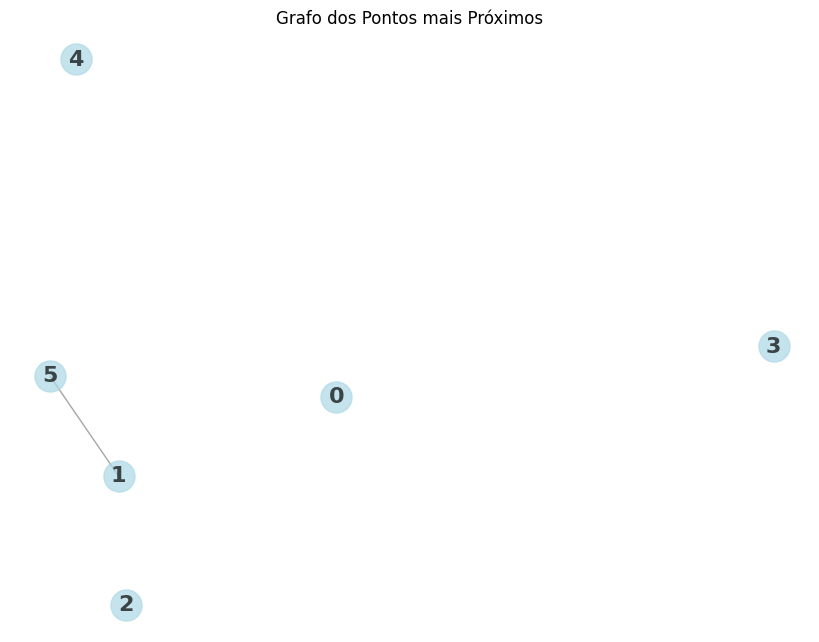

In [32]:
# @title Construção do Grafo

#numero de observações = 6
#se precisar verificar:
num_obser = dados_pca.shape[0]

#grafo vazio
G = nx.Graph()

#adicionando os vertices
for i in range(num_obser):
  G.add_node(i, pos=dados_pca[i])

#adicionando arestas
for i in range(num_obser):

  distancias = []

  for j in range(num_obser):
    if i != j:
      distancias.append((j, distancia(dados_pca[i], dados_pca[j])))

  #ordenando as distancias e pegar o ponto + prox
  distancias = sorted(distancias, key=lambda x: x[1])
  ponto_mais_proximo = distancias[0][0]

  #verificando se o ponto mais próximo também considera o ponto atual como o mais próximo
  distancias_mais_proximos = sorted(
    [(k, distancia(dados_pca[ponto_mais_proximo], dados_pca[k])) for k in range(num_obser) if k != ponto_mais_proximo],
    key=lambda x: x[1])

  if distancias_mais_proximos[0][0] == i:
    G.add_edge(i, ponto_mais_proximo)

#posições dos vertices (visualização)
pos = nx.get_node_attributes(G, 'pos')

#grafo
plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=500, edge_color='gray', font_size=16, font_weight='bold', alpha=0.7)


plt.title('Grafo dos Pontos mais Próximos')
plt.show()

In [33]:
# @title Metrica da razão entre a soma dos 2 primeiros autovalores de A, e a soma de todos os seus autovalore

#ordem decrescente
autovalores_sorted = np.sort(autovalores_ards)[::-1]

#soma dos 2 primeiros autovalores
soma_dois_primeiros = np.sum(autovalores_sorted[:2])

#soma de todos os autovalores
soma_total = np.sum(autovalores_sorted)

#razão
razao = soma_dois_primeiros / soma_total

print(f'Soma dos 2 primeiros autovalores: {soma_dois_primeiros}')
print(f'Soma dos autovalores: {soma_total}')
print(f'Razão (métrica): {razao}')

Soma dos 2 primeiros autovalores: 133.928
Soma dos autovalores: 153.0
Razão (métrica): 0.8753464052287582


In [34]:
# @title Matriz Inversa, se existir

a_inversa = matriz_inversa(A)

Matriz Inversa:
[[ 8.10057398e-01 -2.75783278e-01 -1.87401748e-01 -3.05268161e-02]
 [-2.75783278e-01  1.24940592e-01  7.33009176e-02 -6.98278068e-03]
 [-1.87401748e-01  7.33009176e-02  9.64062443e-02  2.92472489e-04]
 [-3.05268161e-02 -6.98278068e-03  2.92472489e-04  2.54085475e-02]]


In [35]:
# @title Autovalores da Inversa

autovalores_inversa, autovetores_inversa = autovalor_autovetor(a_inversa)

print(f'Autovalores da Matriz Inversa: {autovalores_inversa}')

Autovalores da Matriz Inversa: [0.95513327 0.00936504 0.05547989 0.03683457]


###Você acha que valeria a pena calcular um terceiro fator para o problema de achar os grafos acima, justifique sua resposta.

Valeria para:

- Complexidade de Redes (centralidade, densidade, diametro medio dos caminhos)

- Peso de Arestas (para mais detalhes)

- Análise de Componentes Conectaados (para o numero de componentes)

- Avaliação de Redes (medição de resiliencia - resistencia à desconexão quanto a nós removidos)



## Resolução Prova 2

In [21]:
# @title Relação de Dualidade

#matriz problema
M = np.array([[1, 2, 3], [3, 4, 7]])

Z = M @ M.T

W = M.T @ M

print("Matriz M:")
print(M)
print('')
print("Matriz Z:")
print(Z)
print('')
print("Matriz W:")
print(W)

autovalores_z, autovetores_z = autovalor_autovetor(Z)
autovalores_w, autovetores_w = autovalor_autovetor(W)

#arrendondando as variaveis
autovalores_z = np.round(autovalores_z, 3)
autovalores_w = np.round(autovalores_w, 3)

print('')
print("Autovalores de Z:")
print(autovalores_z)
print('')
print("Autovalores de W:")
print(autovalores_w)


#ordenar os autovalores em ordem decrescente
autovalores_z_ord = np.sort(autovalores_z)[::-1]
autovalores_w_ord = np.sort(autovalores_w)[::-1]

# Calcule τ2 (tau ao quadrado) = λ1 / (λ1 + λ2)
tau2_Z = autovalores_z_ord[0] / (autovalores_z_ord[0] + autovalores_z_ord[1])
tau2_W = autovalores_w_ord[0] / (autovalores_w_ord[0] + autovalores_w_ord[1])

#arrendondando as variaveis
tau2_Z = np.round(tau2_Z, 3)
tau2_W = np.round(tau2_W, 3)

print('')
print("Tau2 de Z:")
print(tau2_Z)
print('')
print("Tau2 de W:")
print(tau2_W)


Matriz M:
[[1 2 3]
 [3 4 7]]

Matriz Z:
[[14 32]
 [32 74]]

Matriz W:
[[10 14 24]
 [14 20 34]
 [24 34 58]]

Autovalores de Z:
[ 0.137 87.863]

Autovalores de W:
[87.863  0.137  0.   ]

Tau2 de Z:
0.998

Tau2 de W:
0.998


In [19]:
# @title direção da primeira componente principal

#matriz de covariância
matriz_cov = np.cov(M.T)

# Calcule os autovalores e autovetores da matriz de covariância
autovalores, autovetores = autovalor_autovetor(matriz_cov)

#o autovalor max e seu autovetor
autovalor_max = np.argmax(autovalores)
componente_principal = autovetores[:, autovalor_max]

#arredondando as variaveis
matriz_cov = np.round(matriz_cov, 3)
autovalores = np.round(autovalores, 3)
autovetores = np.round(autovetores, 3)
componente_principal = np.round(componente_principal, 3)

# Imprima os resultados
print("Matriz de Covariância:\n", matriz_cov)
print('')
print("Autovalores:", autovalores)
print('')
print("Autovetores:\n", autovetores)
print('')
print("Direção da Primeira Componente Principal:", componente_principal)

Matriz de Covariância:
 [[2. 2. 4.]
 [2. 2. 4.]
 [4. 4. 8.]]

Autovalores: [12. -0.  0.]

Autovetores:
 [[-0.408  0.    -0.   ]
 [-0.408  0.894 -0.894]
 [-0.816 -0.447  0.447]]

Direção da Primeira Componente Principal: [-0.408 -0.408 -0.816]


In [24]:
# @title X = QF + U +  µ
'''
X é a matriz de dados
Q é a matriz de carga dos fatores (matriz de loadings) (k é o num de variaveis e m é o num de fatores; k x m parâmetros para Q) (k * m + k + k = k(m+2))
F é a matriz de fatores comum (há 3 vatores comuns por ser uma matriz 2x3)
U é a matriz de fatores individuais (erros especificos)
µ é o vetor de médias das variaveis
'''

#autovalores em ordem decrescente
autovalores_ord = np.sort(autovalores)[::-1]

print("Autovalores ordenados:", autovalores_ord)

#uso de Kaiser para determinar o num de fatores
num_fatores = np.sum(autovalores_ord > 1)

print('')
print("Número de Fatores Comuns:", num_fatores)


#num de variáveis
k = M.shape[1]

m = num_fatores

#num >>total<< de parâmetros
num_parametros = k * (m + 2)

print('')
print("Número Total de Parâmetros:", num_parametros)


Autovalores ordenados: [12.  0. -0.]

Número de Fatores Comuns: 1

Número Total de Parâmetros: 9


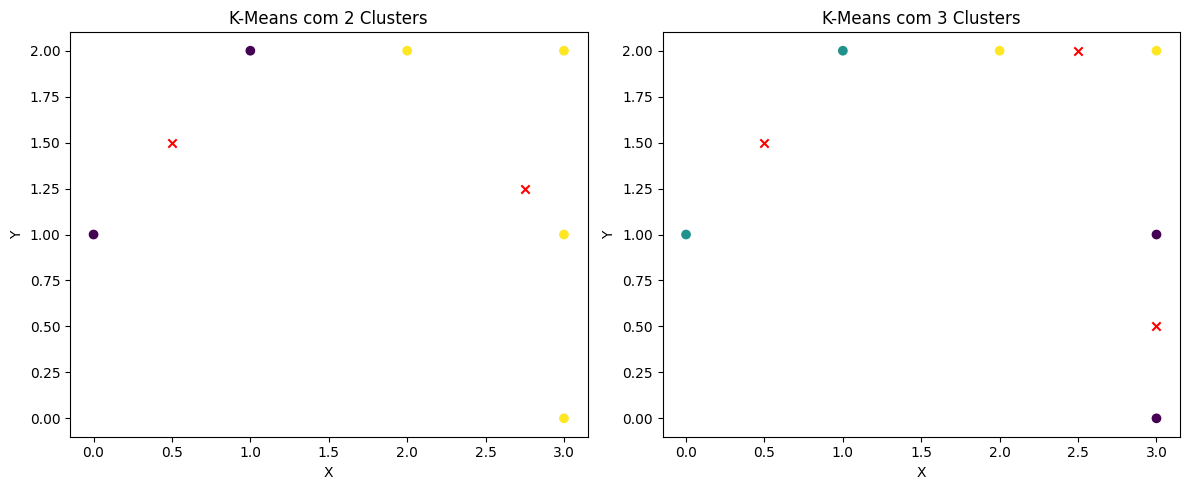

In [42]:
# @title K-médias para clusterização. Nos pontos (1, 2) (2, 2) (3, 2) (0, 1) (3, 0) (3, 1) para 2 e 3 clusters

from sklearn.cluster import KMeans

matriz_pontos = np.array([[1, 2], [2, 2], [3, 2], [0, 1], [3, 0], [3, 1]])

#modelo de k-médias para 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(matriz_pontos)
rotulos_2 = kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_

#modelo de k-médias para 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init=10).fit(matriz_pontos)
rotulos_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_


#plots
'''
abaixo

plot_clusters(matriz_pontos, rotulos_2, centroids_2, 'K-Means com 2 Clusters')
plot_clusters(matriz_pontos, rotulos_3, centroids_3, 'K-Means com 3 Clusters')
'''

#lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_clusters_lado(axs[0], matriz_pontos, rotulos_2, centroids_2, 'K-Means com 2 Clusters')
plot_clusters_lado(axs[1], matriz_pontos, rotulos_3, centroids_3, 'K-Means com 3 Clusters')

plt.tight_layout()
plt.show()


## Aula de Revisão

Usandu a tecnica de componentes principais, calcular os 2 primeiros fatores para os dados:

passo 1 - Calcular S, matriz que estima somatorio = VarX_t, matriz de covariancia amostral

In [ ]:
np.cov(x)

array([[ 2.91666667,  0.66666667,  2.16666667,  5.75      , -0.83333333,
        -0.25      ],
       [ 0.66666667,  2.        ,  2.66666667,  0.66666667, -2.66666667,
         1.        ],
       [ 2.16666667,  2.66666667,  4.33333333,  3.16666667, -3.66666667,
         0.83333333],
       [ 5.75      ,  0.66666667,  3.16666667, 12.25      , -0.5       ,
        -0.41666667],
       [-0.83333333, -2.66666667, -3.66666667, -0.5       ,  3.66666667,
        -1.16666667],
       [-0.25      ,  1.        ,  0.83333333, -0.41666667, -1.16666667,
         0.91666667]])

In [ ]:
#matriz de covariancia amostral (S)

S = np.cov(x_t)

S

array([[ 0.16666667,  0.3       ,  0.13333333, -0.3       ],
       [ 0.3       ,  3.5       , -2.        ,  0.1       ],
       [ 0.13333333, -2.        ,  3.86666667, -0.6       ],
       [-0.3       ,  0.1       , -0.6       ,  6.3       ]])

passo 2 - Calcular os 2 maiores autovalores de S e seus autovetores associados

In [ ]:
#autovetores (V)

autovalores, autovetores = np.linalg.eig(S)

autovalores, autovetores

#pegar os dois maiores

(array([0.09359057, 1.70416222, 5.42033032, 6.61525023]),
 array([[-0.98168333,  0.18105114, -0.04720753, -0.03591336],
        [ 0.15143181,  0.71329706, -0.62513852,  0.2783479 ],
        [ 0.1086977 ,  0.67184101,  0.61694344, -0.39521547],
        [-0.03938341,  0.08400867,  0.47576683,  0.87466417]]))

In [ ]:
autovetores[2] #lambda 5.42

array([ 0.1086977 ,  0.67184101,  0.61694344, -0.39521547])

In [ ]:
x @ autovetores

#0.88336357 é a primeira componente principal (para lambda = 5.42)
#-0.21296937 é a segunda componente principal (para lambda = 5.42)


#7.5953429 é a primeira componente principal (para lambda = 6.61525023)
#0.16566279 é a segunda componente principal (para lambda = 6.61525023)


#Assim para todas as linhas, referente a cada autovalor

array([[-0.90566764,  1.18783026, -0.4871275 ,  3.53999042],
       [-1.28832516,  3.97114018, -1.50225886,  1.52101358],
       [-0.74478331,  0.97726029, -3.15650995,  1.58956128],
       [-0.76033767,  2.95045907,  0.16566279,  7.5953429 ],
       [-0.92517228,  1.73530312,  3.8560618 ,  1.12408485],
       [-0.34937593,  3.74863299, -0.21296937,  0.88336357]])

In [ ]:
media = np.mean(x, axis = 0)
media

array([1.16666667, 2.5       , 0.33333333, 2.5       ])

In [ ]:
(np.ones((4)))

array([1., 1., 1., 1.])

In [ ]:
y_barra = (x - ((np.ones((4))) @ media)) @ autovetores
y_barra


#cada linha de y_barra está ligado a uma observação, das observações de (x @ autovalores)

array([[ 4.04042442, -9.53845591, -3.21949496, -1.15225065],
       [ 3.65776691, -6.755146  , -4.23462631, -3.17122749],
       [ 4.20130876, -9.74902588, -5.88887741, -3.10267979],
       [ 4.1857544 , -7.7758271 , -2.56670466,  2.90310183],
       [ 4.02091979, -8.99098305,  1.12369434, -3.56815622],
       [ 4.59671613, -6.97765318, -2.94533683, -3.8088775 ]])

Pontos principais:

- identificar matrizes, com o intuito de calcular analises fatoriais (geometrica, PCA)

- Computacionalmente identificar os maiores autovalores e os respectivos autovalores

- Em seguida calcular os fatores para os dados de entrada